# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pwd

'C:\\Users\\kevin\\Documents\\python-api-challenge\\WeatherPy'

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
RandomCities = pd.DataFrame(cities)
RandomCities.head()

Number of cities in the list: 562


,0
0,belle fourche
1,mount gambier
2,morant bay
3,yellowknife
4,constantia


In [51]:
cities

['belle fourche',
 'mount gambier',
 'morant bay',
 'yellowknife',
 'constantia',
 'boguchany',
 'port-aux-francais',
 'saudarkrokur',
 'lata',
 'dongola',
 'fuglafjordur',
 'prince george',
 'santa cruz',
 'lubango',
 'kodiak',
 'broken hill',
 'north bend',
 'quellon',
 'lompoc',
 'puerto natales',
 'manuel ojinaga',
 'san antonio de pale',
 'lebu',
 'luderitz',
 'blackmans bay',
 'waitangi',
 'grytviken',
 'alotau',
 'hawaiian paradise park',
 'avarua',
 'yeppoon',
 'mikuni',
 'weno',
 'tiksi',
 'taltal',
 'hermanus',
 'isafjordur',
 "st. john's",
 'puerto ayora',
 'marudi',
 'adamstown',
 'invercargill',
 'kuanda',
 'bredasdorp',
 'lihue',
 'utrik',
 'iskateley',
 'chonchi',
 'uturoa',
 'stanley',
 'mahina',
 'ushuaia',
 'souillac',
 'whitehorse',
 'talnakh',
 'tluszcz',
 'wailua homesteads',
 'punta arenas',
 'bethel',
 'buka',
 'nadi',
 'klyuchi',
 'margaret river',
 'olonkinbyen',
 'kone',
 'port elizabeth',
 'dudinka',
 'vorgashor',
 'karratha',
 "kapa'a",
 'edinburgh of the se

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#examplecity, Fuglafjørður
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key
city_url = url + "&q=" + "fuglafjordur"
city_weather = requests.get(city_url).json()
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 27},
 'cod': 200,
 'coord': {'lat': 62.244, 'lon': -6.814},
 'dt': 1685044977,
 'id': 2621808,
 'main': {'feels_like': 3.77,
          'grnd_level': 1017,
          'humidity': 85,
          'pressure': 1024,
          'sea_level': 1024,
          'temp': 8.26,
          'temp_max': 8.26,
          'temp_min': 8.26},
 'name': 'Fuglafjørður',
 'sys': {'country': 'FO',
         'id': 1596,
         'sunrise': 1684984012,
         'sunset': 1685050906,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 272, 'gust': 13.95, 'speed': 10.63}}


In [72]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        #city_date = # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          #"Date": city_date
                         })

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belle fourche
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | morant bay
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | constantia
Processing Record 6 of Set 1 | boguchany
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | saudarkrokur
Processing Record 9 of Set 1 | lata
Processing Record 10 of Set 1 | dongola
Processing Record 11 of Set 1 | fuglafjordur
Processing Record 12 of Set 1 | prince george
Processing Record 13 of Set 1 | santa cruz
Processing Record 14 of Set 1 | lubango
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | broken hill
Processing Record 17 of Set 1 | north bend
Processing Record 18 of Set 1 | quellon
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | manuel ojinaga
City not found. Skipping...
Processing R

Processing Record 41 of Set 4 | anadyr
Processing Record 42 of Set 4 | tuguegarao
Processing Record 43 of Set 4 | nemuro
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | isna
Processing Record 46 of Set 4 | ternate
Processing Record 47 of Set 4 | port douglas
Processing Record 48 of Set 4 | tolanaro
Processing Record 49 of Set 4 | guerrero negro
Processing Record 0 of Set 5 | alupka
Processing Record 1 of Set 5 | san julian
Processing Record 2 of Set 5 | gamba
Processing Record 3 of Set 5 | westport
Processing Record 4 of Set 5 | gadzhiyevo
Processing Record 5 of Set 5 | usinsk
Processing Record 6 of Set 5 | wotho
Processing Record 7 of Set 5 | santa marta de ortigueira
Processing Record 8 of Set 5 | bowen
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | valdivia
Processing Record 11 of Set 5 | divino das laranjeiras
Processing Record 12 of Set 5 | mao
Processing Record 13 of Set 5 | san patricio
Processing Record 14 of Set 5 | phan rang-t

Processing Record 36 of Set 8 | tobi village
City not found. Skipping...
Processing Record 37 of Set 8 | buala
Processing Record 38 of Set 8 | haiku-pauwela
Processing Record 39 of Set 8 | porbandar
Processing Record 40 of Set 8 | dryden
Processing Record 41 of Set 8 | ornskoldsvik
Processing Record 42 of Set 8 | karagandy
Processing Record 43 of Set 8 | lichinga
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 46 of Set 8 | kachug
Processing Record 47 of Set 8 | ukiah
Processing Record 48 of Set 8 | severo-yeniseyskiy
Processing Record 49 of Set 8 | pirapemas
Processing Record 0 of Set 9 | taulaga
Processing Record 1 of Set 9 | queenstown
Processing Record 2 of Set 9 | sidi bel abbes
Processing Record 3 of Set 9 | aleksandrov gay
Processing Record 4 of Set 9 | bechar
Processing Record 5 of Set 9 | pasni
Processing Record 6 of Set 9 | siwa oasis
Processing Record 7 of Set 9 | pikalevo
Processing Record

In [73]:
city_data_df = pd.DataFrame(city_data)
print(city_data_df.count())

City          537
Lat           537
Lng           537
Max Temp      537
Humidity      537
Cloudiness    537
Wind Speed    537
Country       537
dtype: int64


In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,belle fourche,44.6714,-103.8522,301.51,48,100,5.55,US
1,mount gambier,-37.8333,140.7667,283.30,60,95,4.92,AU
2,morant bay,17.8815,-76.4093,305.21,64,0,3.79,JM
3,yellowknife,62.4560,-114.3525,286.44,58,75,3.09,CA
4,constantia,44.1833,28.6500,291.53,82,39,2.50,RO


In [78]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,belle fourche,44.6714,-103.8522,301.51,48,100,5.55,US
1,mount gambier,-37.8333,140.7667,283.30,60,95,4.92,AU
2,morant bay,17.8815,-76.4093,305.21,64,0,3.79,JM
3,yellowknife,62.4560,-114.3525,286.44,58,75,3.09,CA
4,constantia,44.1833,28.6500,291.53,82,39,2.50,RO


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

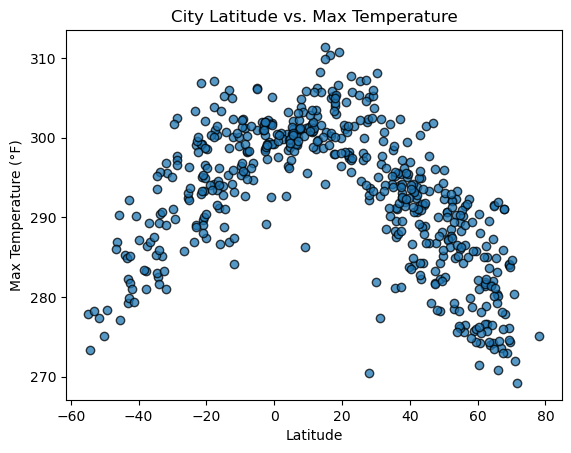

In [81]:
# Build plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)
# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Save the figure
plt.savefig("Fig1Latvs.Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

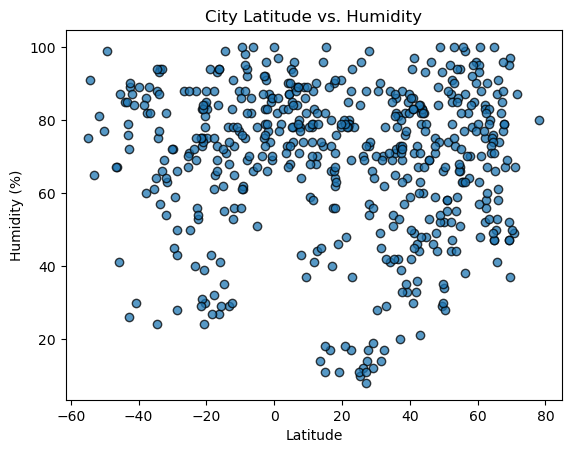

In [82]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Fig2Latvs.Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

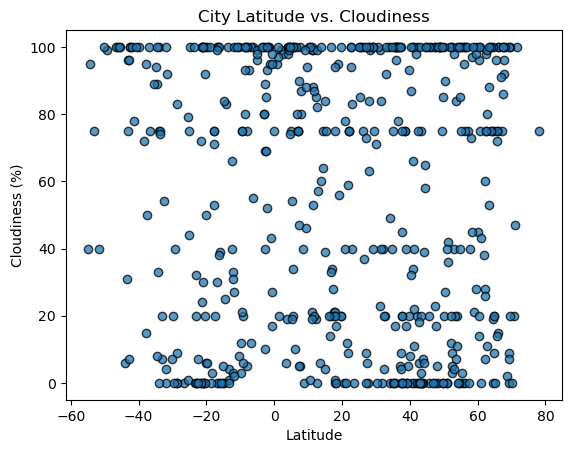

In [83]:
# Build the scatter plots for latitude vs. cloudiness, dont forget grid lines
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Fig3Latvs.Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

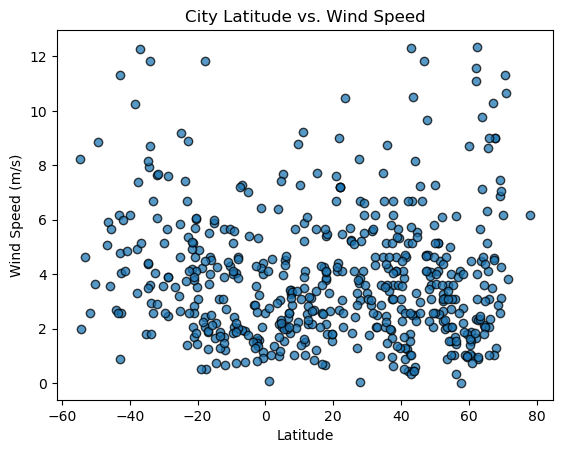

In [84]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("Fig4Latvs.WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    

In [86]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
0,belle fourche,44.6714,-103.8522,301.51,48,100,5.55,US
2,morant bay,17.8815,-76.4093,305.21,64,0,3.79,JM
3,yellowknife,62.4560,-114.3525,286.44,58,75,3.09,CA
4,constantia,44.1833,28.6500,291.53,82,39,2.50,RO
5,boguchany,58.3814,97.4531,278.73,78,97,2.76,RU


In [87]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
City_ID,,,,,,,,
1,mount gambier,-37.8333,140.7667,283.30,60,95,4.92,AU
6,port-aux-francais,-49.3500,70.2167,278.36,99,99,8.87,TF
12,santa cruz,-17.8000,-63.1667,303.85,61,75,11.83,BO
13,lubango,-14.9172,13.4925,288.74,55,0,1.64,AO
15,broken hill,-31.9500,141.4333,281.00,82,0,7.65,AU


###  Temperature vs. Latitude Linear Regression Plot

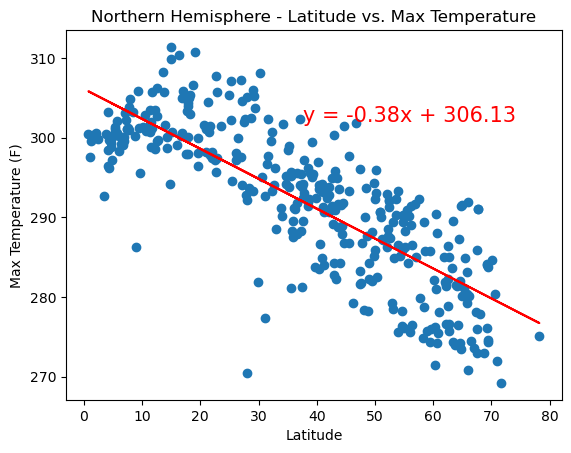

In [95]:
#x and y for the linear regression code
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color="red")

# Annotate the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.mean(), y_values.mean()+10), fontsize=15, color="red")

# Set the x and y labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the title
plt.title("Northern Hemisphere - Latitude vs. Max Temperature")

# Save the figure
#plt.savefig("Northern_Hemisphere_Max_Temp.png")

# Show the plot
plt.show()


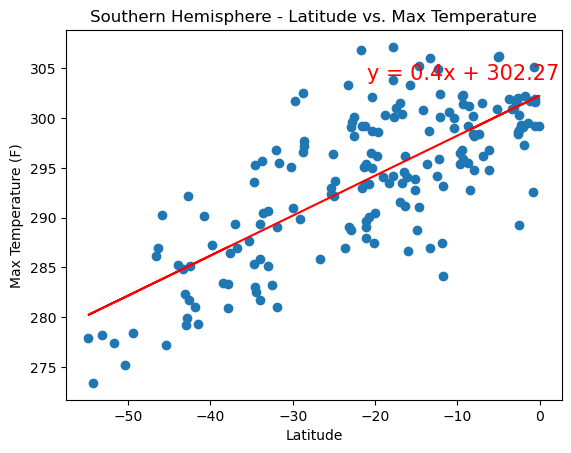

In [97]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate the regression values
regress_values = x_values * slope + intercept

# Create the scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color="red")

# Annotate the equation of the regression line
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.mean(), y_values.mean()+10), fontsize=15, color="red")

# Set the x and y labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Set the title
plt.title("Southern Hemisphere - Latitude vs. Max Temperature")

# Save the figure
plt.savefig("Southern_Hemisphere_Max_Temp.png")

# Show the plot
plt.show()

**Discussion about the linear relationship:** as the latitude from the southern hemisphere gets closer to 0, the temperature increases. in the northern hemisphere as it goes away from latitude 0, the temperature decreases. This means as you move away from the equator (latitude 0) towards the northern or southern poles the temperature decreases. The middle of the equator is the warmest part of the earth. 

### Humidity vs. Latitude Linear Regression Plot

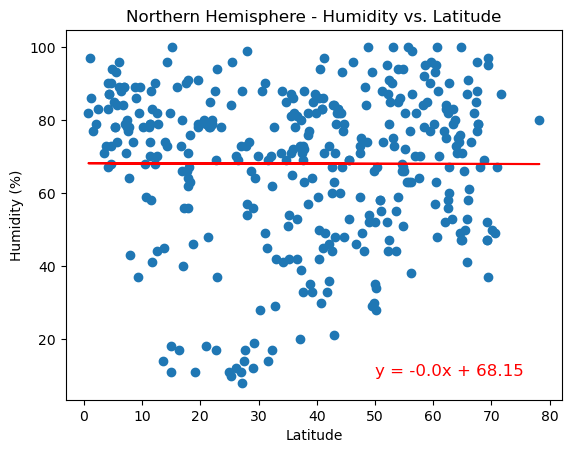

In [98]:
# Northern Hemisphere
# linear regression for Humidity vs. Latitude in the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color='red')

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (50, 10), fontsize=12, color='red')

# Set plot title and labels
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("Northern_Hemisphere_Humidity_vs_Latitude.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** no relationship between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

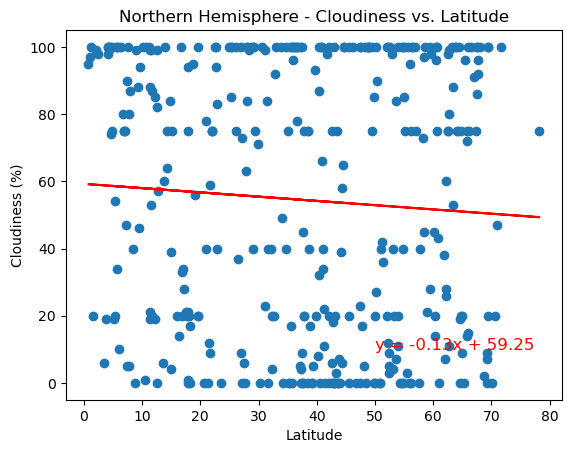

In [100]:
# Northern Hemisphere
# Perform linear regression for Cloudiness vs. Latitude in the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color='red')

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (50, 10), fontsize=12, color='red')

# Set plot title and labels
plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Northern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


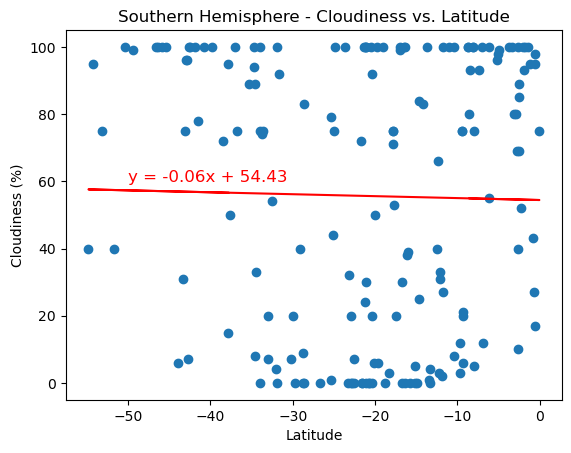

In [101]:
# Southern Hemisphere
# Perform linear regression for Cloudiness vs. Latitude in the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color='red')

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-50, 60), fontsize=12, color='red')

# Set plot title and labels
plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("Southern_Hemisphere_Cloudiness_vs_Latitude.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** based on the data/graphs there is little correlation between cloudiness and latitude

### Wind Speed vs. Latitude Linear Regression Plot

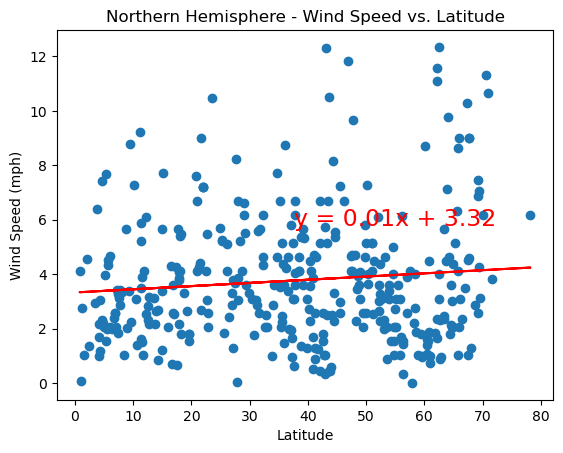

In [108]:
# Northern Hemisphere
# Perform linear regression for Wind Speed vs. Latitude in the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color='red')

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (x_values.mean(), y_values.mean()+2), fontsize=17, color='red')

# Set plot title and labels
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Northern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()


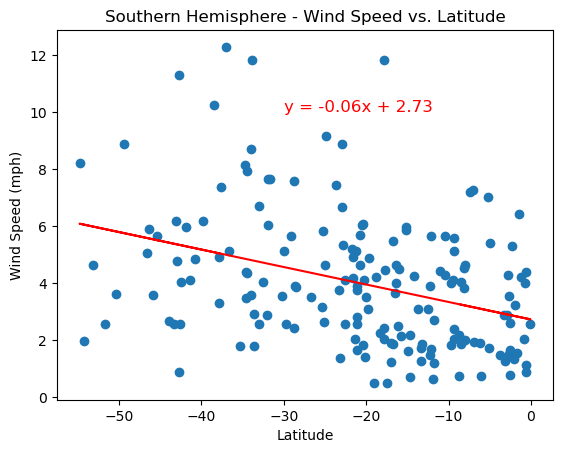

In [109]:
# Southern Hemisphere
# Perform linear regression for Wind Speed vs. Latitude in the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create scatter plot
plt.scatter(x_values, y_values)

# Plot the regression line
plt.plot(x_values, regress_values, color='red')

# Annotate the line equation
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
plt.annotate(line_eq, (-30, 10), fontsize=12, color='red')

# Set plot title and labels
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("Southern_Hemisphere_Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()


**Discussion about the linear relationship:** As you get closer to the equator from the southern hemisphere the windspeed tends to decrease. In the northern hemisphere the wind speed slightly increases as you move away from latitude 0. 